In [ ]:
%matplotlib inline


본 프로젝트는 CNN 알고리즘을 연습을 위한 프로젝트이며, 사전학습 모델을 사용하지 않고 모델을 직접 만들어보았습니다.

cifar 데이터의 정확도를 개선시키는 프로젝트입니다.

다음과 같은 단계로 진행해보겠습니다:

1. ``torchvision`` 을 사용하여 CIFAR100의 학습용 / 시험용 데이터셋을
   불러오고, 정규화(nomarlizing)합니다.
2. 합성곱 신경망(Convolution Neural Network)을 정의합니다.
3. 손실 함수를 정의합니다.
4. 학습용 데이터를 사용하여 신경망을 학습합니다.
5. 시험용 데이터를 사용하여 신경망을 검사합니다.



In [ ]:

import torch
import torchvision
import torchvision.transforms as transforms
from google.colab import files
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME = None
FOLDERNAME = "2021/aml/termprojects"
assert FOLDERNAME is not None, "[!] Enter the foldername."

import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


torchvision 데이터셋의 출력(output)은 [0, 1] 범위를 갖는 PILImage 이미지입니다.
이를 [-1, 1]의 범위로 정규화된 Tensor로 변환합니다.

<div class="alert alert-info"><h4>Note</h4><p>만약 Windows 환경에서 BrokenPipeError가 발생한다면,
    torch.utils.data.DataLoader()의 num_worker를 0으로 설정해보세요.</p></div>



In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# CUDA 기기가 존재한다면, 아래 코드가 CUDA 장치를 출력합니다:

print(device)

cuda:0


In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 16

#trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
#                                        download=True, transform=transform)
trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

#testset = torchvision.datasets.CIFAR10(root='./data', train=False,
#                                       download=True, transform=transform)
testset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

#classes = ('plane', 'car', 'bird', 'cat',
#           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


classes = ('apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm')

Files already downloaded and verified
Files already downloaded and verified


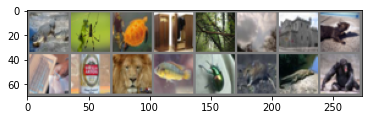

crocodile spider turtle wardrobe forest cloud castle squirrel keyboard   can  lion aquarium_fish beetle mouse crocodile chimpanzee


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

2. 합성곱 신경망(Convolution Neural Network) 정의하기

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
      super().__init__()
      self.conv = nn.Conv2d(200,200,5)
      self.conv10 = nn.Conv2d(200,200 ,2)
      self.conv12 = nn.Conv2d(200,200 ,3) 
      self.conv11 = nn.Conv2d(200,200 ,3,padding=1) 
      self.conv13 = nn.Conv2d(200,200 ,3,padding=1) 
      self.conv14 = nn.Conv2d(3,200 ,3,padding=1) 
      
      self.fc1 = nn.Linear(7*7*200, 400)
      self.fc2 = nn.Linear(400, 240)
      self.fc3 = nn.Linear(240, 100)
      self.bt1= nn.BatchNorm2d(200,eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      self.pool = nn.AvgPool2d(2,2) 
      self.pool1 = nn.MaxPool2d(2,2)
      
    def forward(self, x):
        x1 = self.bt1(self.conv13(F.relu((self.conv14(x))))) #200*32*32
        x2=(x1+self.conv14(x))/2
        x3 = self.bt1(self.conv13(F.relu(self.conv13(x2)))) #200*32*32
        x_new = self.pool1((self.bt1(F.relu(self.conv12(self.bt1(F.relu(self.conv12(x3)))))))) #200*14*14
        x_new=(self.pool1(self.conv(x3))+x_new)/2 #200*14*14
        x_new2 = F.relu((self.bt1(self.conv11(F.relu(self.conv11(x_new)))))) #200*14*14
        x_new = (x_new+x_new2)/2 #200*14*14
        x_new1 = F.relu(self.bt1(self.conv11(F.relu(self.bt1(self.conv11(x_new)))))) #200*14*14
        x_new2 = F.relu(self.bt1(self.conv11(F.relu(self.bt1(self.conv11(x_new1))))))  #200*14*14
        x=(self.pool1(x_new)+self.pool1(x_new2))/2 #200*7*7
        
        x = x.view(-1, 7*7*200)
        x = F.relu(self.fc1(x))
        x = F.relu((self.fc2(x)))
        x = F.relu(self.fc3(x))
        
        
        return x
net=Net()

3. 손실 함수와 Optimizer 정의하기
교차 엔트로피 손실(Cross-Entropy loss)과 모멘텀(momentum) 값을 갖는 SGD를 사용합니다.



In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
#criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

4. 신경망 학습하기
단순히 데이터를 반복해서 신경망에 입력으로 제공하고, 최적화(Optimize)만 하면
됩니다.



In [ ]:
net.to(device)





for epoch in range(20):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data[0].to(device),data[1].to(device)

        
        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = net(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 800 == 799:    # print every 800 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,   800] loss: 1.836
[1,  1600] loss: 1.812
[1,  2400] loss: 1.784
[2,   800] loss: 1.724
[2,  1600] loss: 1.692
[2,  2400] loss: 1.664
[3,   800] loss: 1.605
[3,  1600] loss: 1.577
[3,  2400] loss: 1.536
[4,   800] loss: 1.469
[4,  1600] loss: 1.447
[4,  2400] loss: 1.417
[5,   800] loss: 1.357
[5,  1600] loss: 1.333
[5,  2400] loss: 1.298
[6,   800] loss: 1.233
[6,  1600] loss: 1.227
[6,  2400] loss: 1.217
[7,   800] loss: 1.161
[7,  1600] loss: 1.142
[7,  2400] loss: 1.125
[8,   800] loss: 1.078
[8,  1600] loss: 1.079
[8,  2400] loss: 1.075
[9,   800] loss: 1.034
[9,  1600] loss: 1.023
[9,  2400] loss: 0.992
[10,   800] loss: 0.953
[10,  1600] loss: 0.954
[10,  2400] loss: 0.947
[11,   800] loss: 0.895
[11,  1600] loss: 0.903
[11,  2400] loss: 0.889
[12,   800] loss: 0.847
[12,  1600] loss: 0.857
[12,  2400] loss: 0.858
[13,   800] loss: 0.801
[13,  1600] loss: 0.808
[13,  2400] loss: 0.822
[14,   800] loss: 0.769
[14,  1600] loss: 0.768
[14,  2400] loss: 0.764
[15,   800] loss: 0

학습한 모델을 저장해보겠습니다:



In [ ]:
net

In [ ]:


FILENAME = 'machinerunning_model17.pth'
FOLDERNAME = "wonsik"
PATH='/content/drive/MyDrive/{}'.format(FOLDERNAME)+'/'+FILENAME
torch.save(net.state_dict(), PATH)

#torch.save(net.state_dict(), 'checkpoint4.pth')

# download checkpoint file
#files.download('checkpoint.pth')

PyTorch 모델을 저장하는 자세한 방법은 `여기 <https://pytorch.org/docs/stable/notes/serialization.html>`_
를 참조해주세요.

5. 시험용 데이터로 신경망 검사하기

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# 이미지를 출력합니다.
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

이제, 저장했던 모델을 불러오도록 하겠습니다



In [ ]:
FILENAME = FILENAME
net = Net()
net.load_state_dict(torch.load(PATH))

NameError: ignored

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))



전체 데이터셋에 대해서는 어떻게 동작하는지 보겠습니다.



In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

100가지 분류 중 어떤 것들을 더 잘 분류하고, 어떤 것들을 더 못했는지 알아보겠습니다:



In [ ]:
class_correct = list(0. for i in range(100))
class_total = list(0. for i in range(100))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(100):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))